In [1]:
# py-sc-fermi

import timeit

start = timeit.default_timer()

from py_sc_fermi.defect_system import DefectSystem
from py_sc_fermi.defect_species import DefectSpecies
from py_sc_fermi.inputs import inputs_from_files

import numpy as np

import sc_pyper_functions as scpf
import pandas as pd


defects = scpf.import_calculations_from_file('defects.yaml')
elements = scpf.import_calculations_from_file('elements.yaml')
interest = scpf.import_calculations_from_file('interest.yaml')
grid = (pd.read_csv('grid.dat', skiprows=10, sep='\s+'))  # 'grid' refers to a stability region divded into a grid of approximatley 80 points

import yaml

with open('automator_config.yaml', 'r') as stream:
    try:
        a = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

def make_all_defects(config_dict,chem_pots):
    to_write = []
    defs = []
    for k,v in config_dict['defects'].items():
        label = [i for i in config_dict['defects'][k][1:]]
        to_calcs = [defects[i] for i in label]
        out = scpf.make_defect(to_calcs, elements, interest['LLZO'], delta_mu=chem_pots, corr=config_dict['iccs'], sites=1)
        out.n_sites = config_dict['defects'][out.label][0]
        defs.append(out)
    return defs


unitcell_filename = 'unitcell.dat'
totdos_filename = 'totdos.dat'
input_fermi_filename = 'input-fermi.dat'

inputs = inputs_from_files(unitcell_filename=unitcell_filename, 
                           input_fermi_filename=input_fermi_filename, 
                           totdos_filename=totdos_filename)

examples =  (75,12,42)  

tls = []
ex = []
for i in examples:
    b = make_all_defects(a,grid.iloc[i].to_dict())

    scf = scpf.SCFermi( b, a['nelect'], a['e_gap'], 1500, a['spin_polarised'])
    scf.output()
    
    defect_system = DefectSystem( defect_species=inputs['defect_species'],
                                  volume=inputs['volume'],
                                  dos=inputs['dos'],
                                  temperature=inputs['temperature'])

    #print(defect_system)

    unitcell_filename = 'unitcell.dat'
    totdos_filename = 'totdos.dat'
    input_fermi_filename = 'input-fermi.dat'

    inputs = inputs_from_files(unitcell_filename=unitcell_filename, 
                                   input_fermi_filename=input_fermi_filename, 
                                   totdos_filename=totdos_filename)
    
    out = defect_system.to_dict()
    out_tls = defect_system.get_transition_levels()
    ex.append(out)
    tls.append(out_tls)
          


Volume of cell: 1056.622886347127 A^3
Found spin polarised system...
Number of electrons in system: 544
Energy gap of system: 5.904 eV
Temperature: 1500.0 K
Number of defect species: 13
Reading spin-polarised DOS
Volume of cell: 1056.622886347127 A^3
Found spin polarised system...
Number of electrons in system: 544
Energy gap of system: 5.904 eV
Temperature: 1500.0 K
Number of defect species: 13
Reading spin-polarised DOS
Volume of cell: 1056.622886347127 A^3
Found spin polarised system...
Number of electrons in system: 544
Energy gap of system: 5.904 eV
Temperature: 1500.0 K
Number of defect species: 13


/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:763: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/mnt/c/Users/Alex/Materials_work/new_fermi/py-sc-fermi/py_sc_fermi/defect_charge_state.py:79: RuntimeWarning: overflow encountered in exp
  return self.degeneracy * np.exp(expfac)
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1762: RuntimeWarning: invalid value encountered in double_scalars
  p = (xf - fulc) * q - (xf - nfc) * r
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1763: RuntimeWarning: invalid value encountered in double_scalars
  q = 2.0 * (q - r)


Reading spin-polarised DOS
Volume of cell: 1056.622886347127 A^3
Found spin polarised system...
Number of electrons in system: 544
Energy gap of system: 5.904 eV
Temperature: 1500.0 K
Number of defect species: 13
Reading spin-polarised DOS


Volume of cell: 1056.622886347127 A^3
Found spin polarised system...
Number of electrons in system: 544
Energy gap of system: 5.904 eV
Temperature: 1500.0 K
Number of defect species: 13
Reading spin-polarised DOS


/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:763: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/mnt/c/Users/Alex/Materials_work/new_fermi/py-sc-fermi/py_sc_fermi/defect_charge_state.py:79: RuntimeWarning: overflow encountered in exp
  return self.degeneracy * np.exp(expfac)
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1762: RuntimeWarning: invalid value encountered in double_scalars
  p = (xf - fulc) * q - (xf - nfc) * r
/home/alex/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1763: RuntimeWarning: invalid value encountered in double_scalars
  q = 2.0 * (q - r)


{'Fermi Energy': 3.1785703945135086,
 'La_Zr': 565914264961150.2,
 'Li_La': 1.0991371069878958e+16,
 'Li_Zr': 1645374456.7626367,
 'Li_i': 3.169370479341566e+19,
 'O_i': 3153137.057312834,
 'Zr_La': 4872177909583271.0,
 'Zr_Li': 1368423886905108.8,
 'Zr_Li_tet': 16486712755.35114,
 'Zr_i': 880312103.9011716,
 'n0': 209036638915.89456,
 'p0': 209036638915.89456,
 'v_La': 565346731281.9884,
 'v_Li': 3.1680207868599337e+19,
 'v_O': 45581144818779.31,
 'v_Zr': 250545.79593843507}

In [8]:
for ds in defect_system.defect_species:
        charge_state_concentrations = ds.charge_state_concentrations(fermi, 1500)
        concall = ds.get_concentration(fermi, 1500)

NameError: name 'fermi' is not defined

In [9]:
defect_system.defect_species[6].charge_state_concentrations(fermi,1500)

NameError: name 'fermi' is not defined

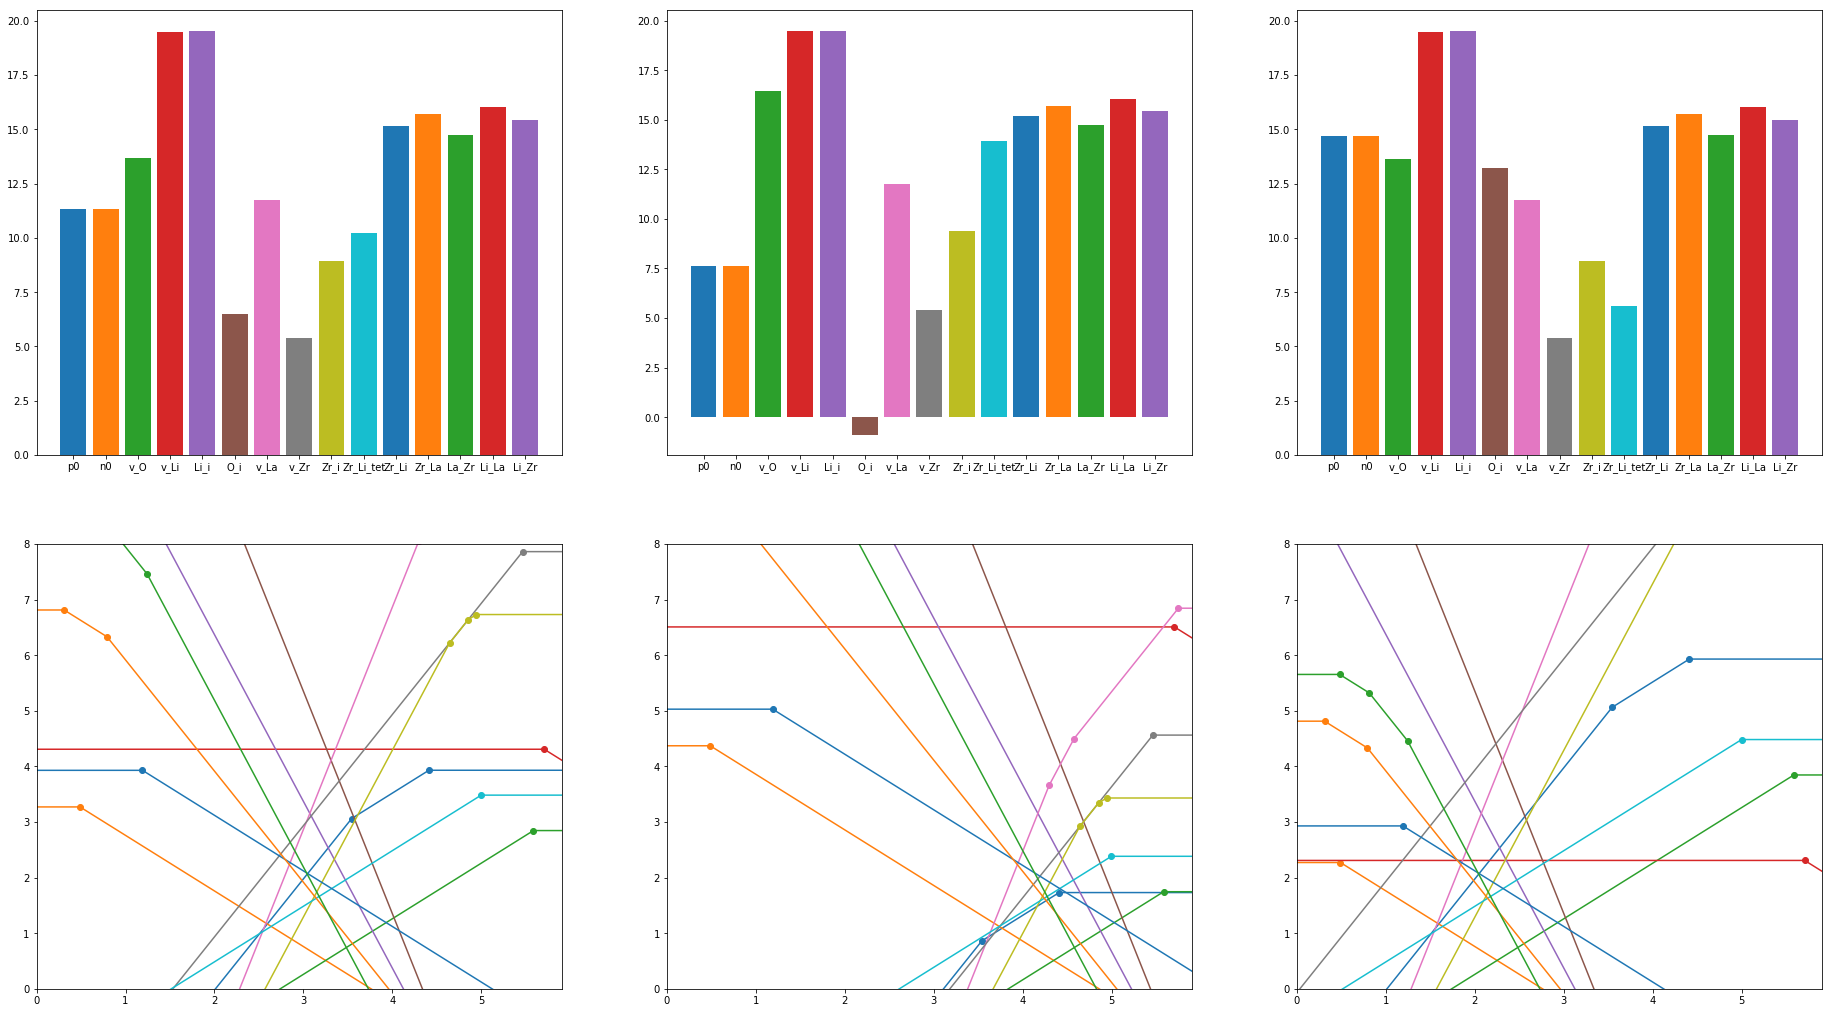

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2,3, figsize =(32,18))
axs=axs.flatten()
for j,i in enumerate(ex):
    ax=axs[j]
    for k,v in i.items():
        if k != 'Fermi Energy':
            ax.bar(k,np.log10(v))

for j,i in enumerate(tls):
    ax=axs[j+3]
    for tl in i.values():
        ax.plot(tl[0],tl[1], '-o', label=i)
    ax.set_xlim(0,5.904)
    ax.set_ylim(0,8)

(0, 8)

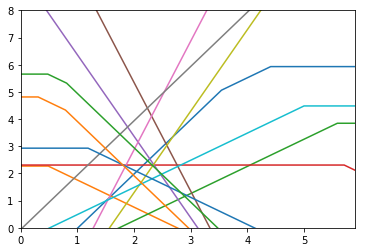

(0, 8)

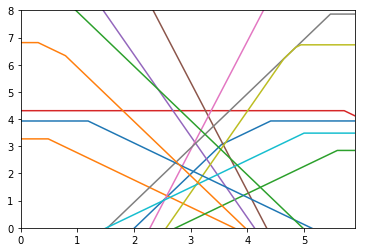

In [5]:
import matplotlib.pyplot as plt
defect_system = DefectSystem( defect_species=inputs['defect_species'],
                                  volume=inputs['volume'],
                                  dos=inputs['dos'],
                                  temperature=inputs['temperature'])
tls = defect_system.get_transition_levels()
for i in tls.values():
    plt.plot(i[0],i[1])
plt.xlim(0,5.904)
plt.ylim(0,8)